In [19]:
!pip install xgboost catboost matplotlib seaborn

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("glass.csv")

In [22]:
X = df.drop("Type", axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df["Type"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-643044152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=[r["acc"] for r in results.values()], palette="viridis")


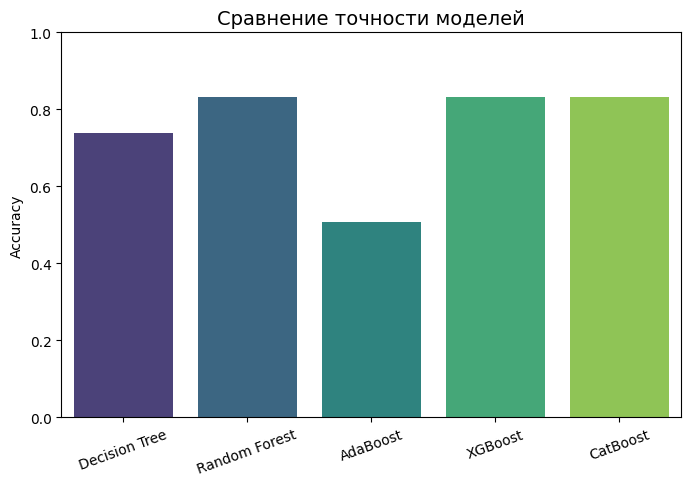

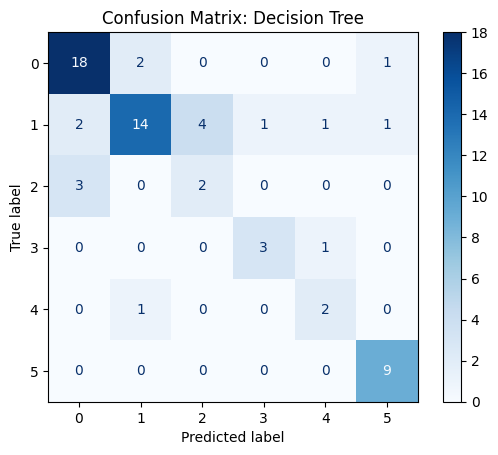

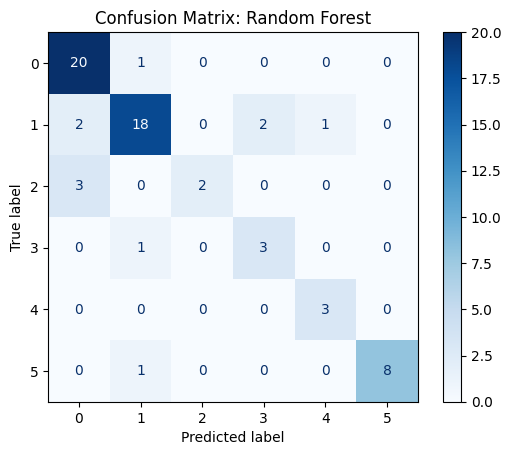

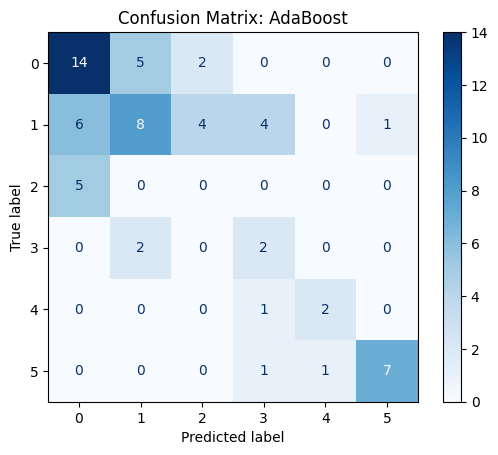

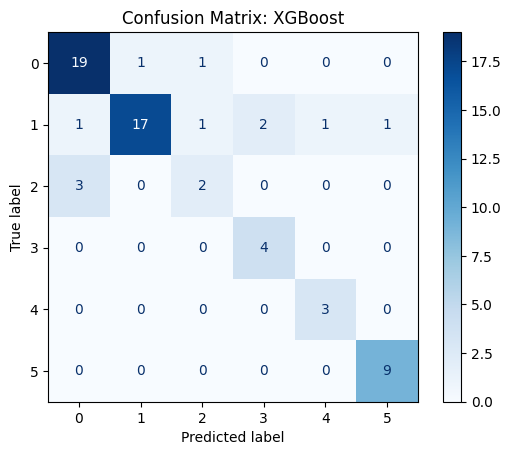

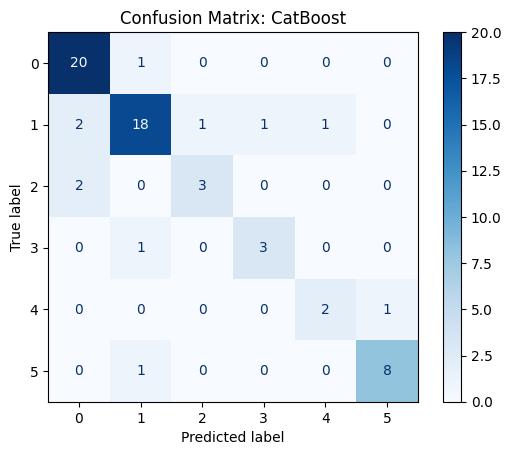

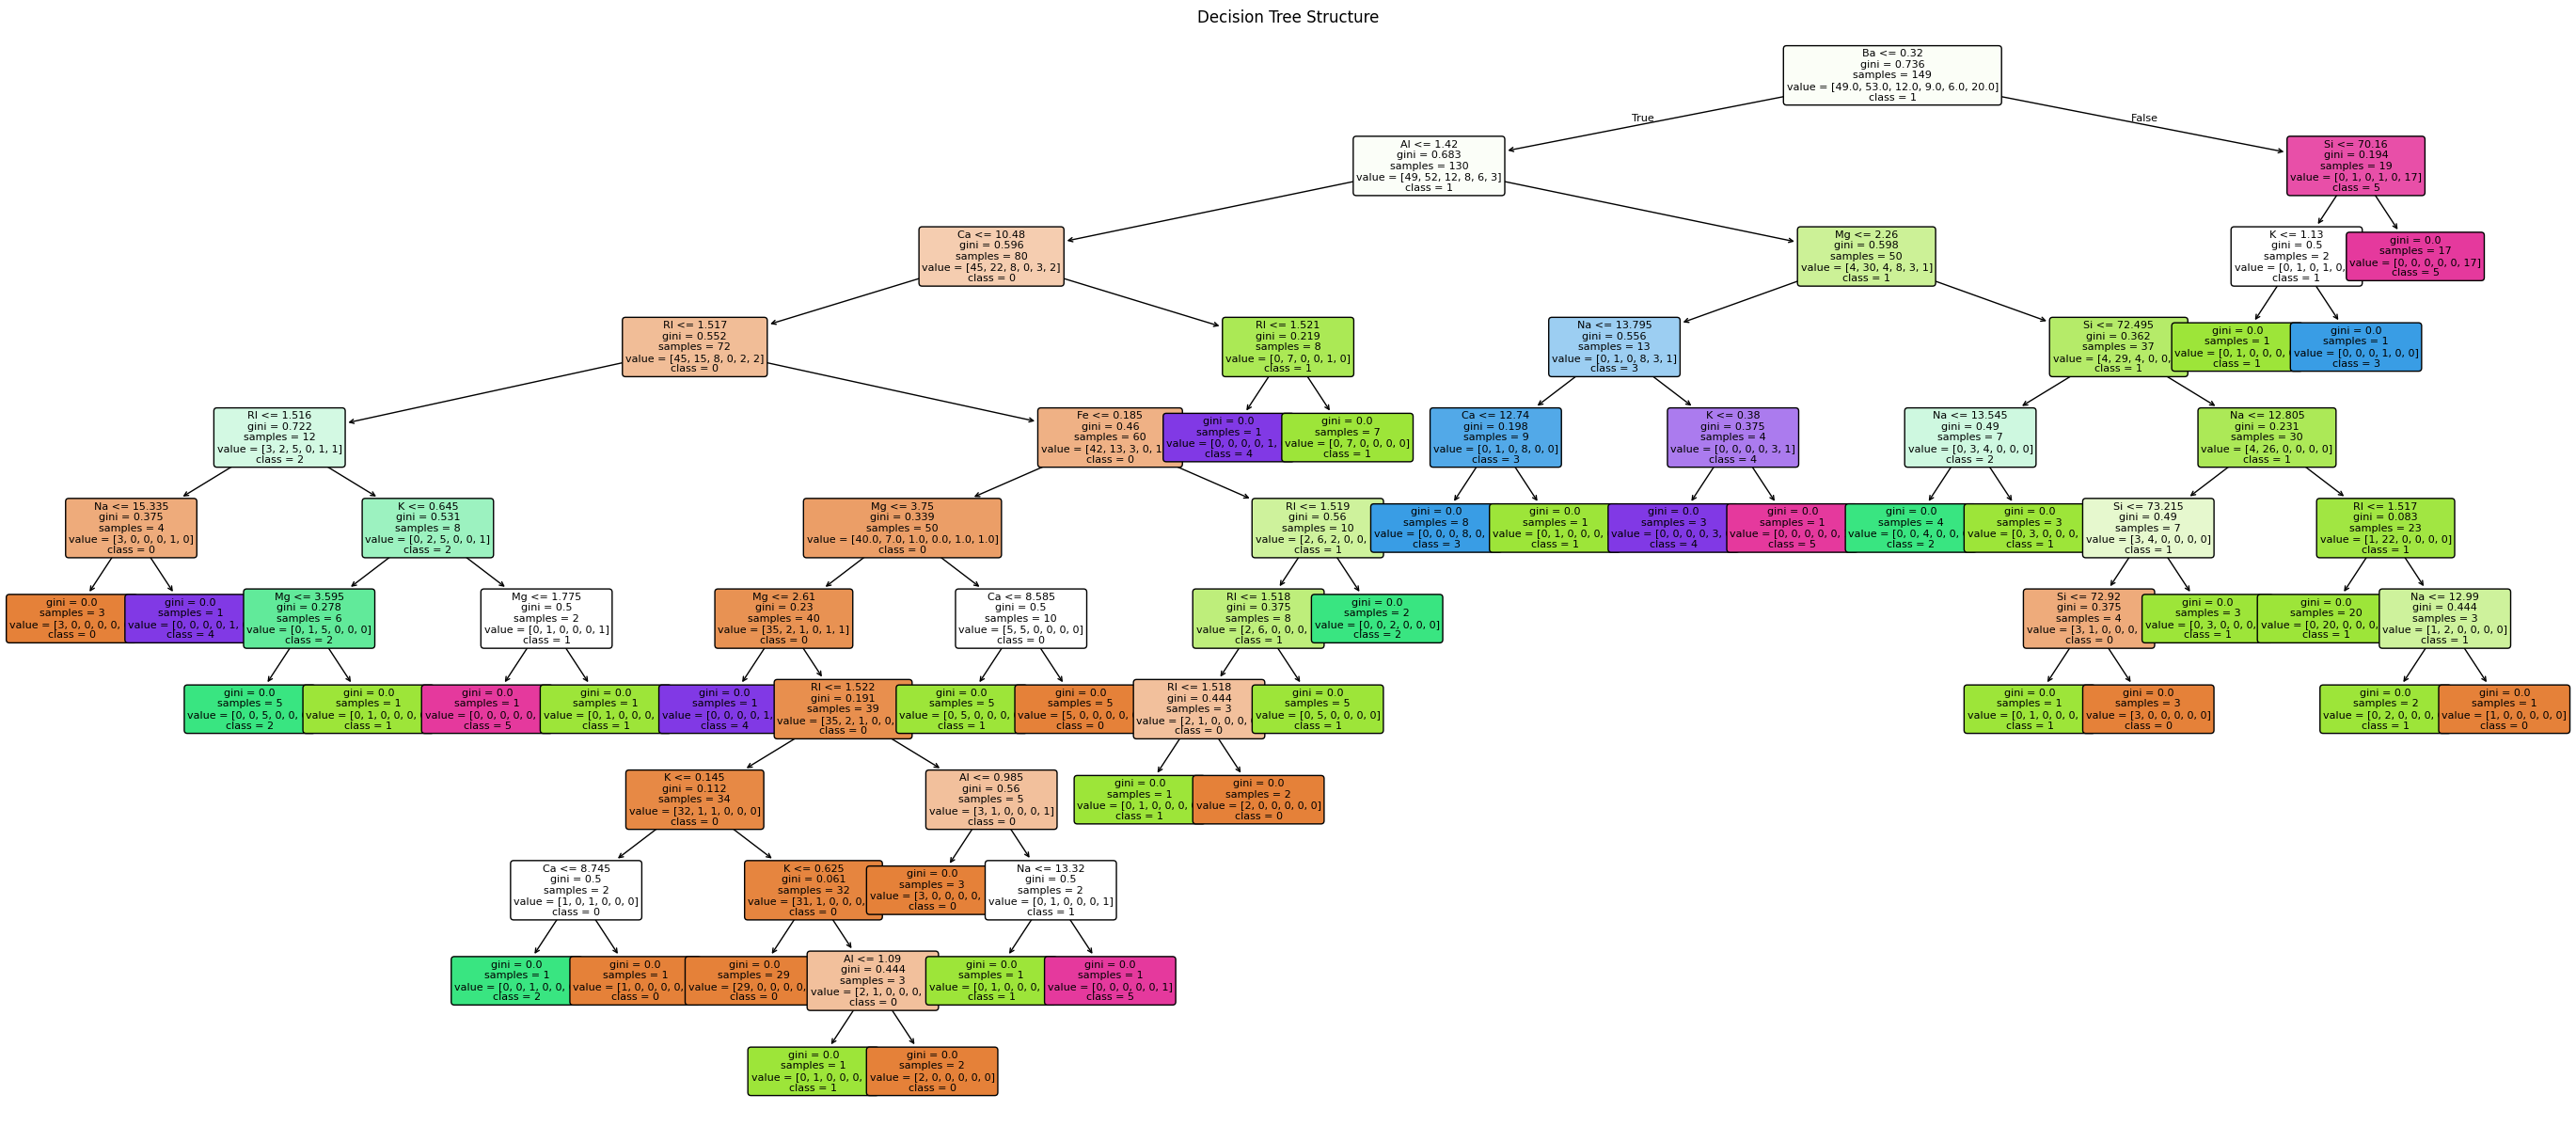

/tmp/ipython-input-643044152.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="mako")


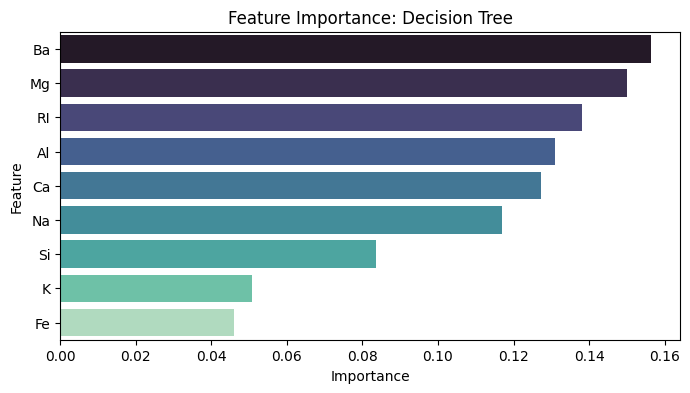

/tmp/ipython-input-643044152.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="mako")


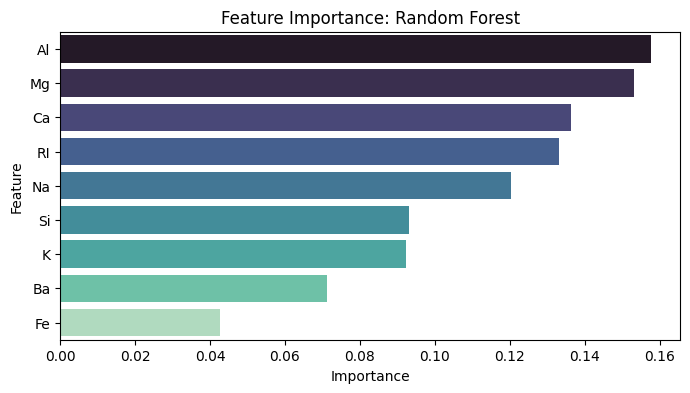

/tmp/ipython-input-643044152.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="mako")


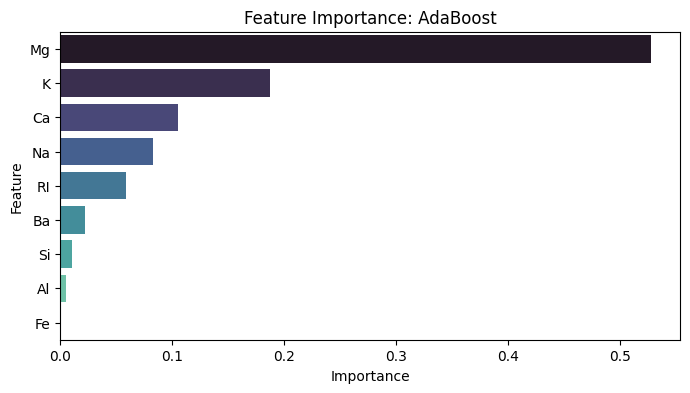

/tmp/ipython-input-643044152.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="mako")


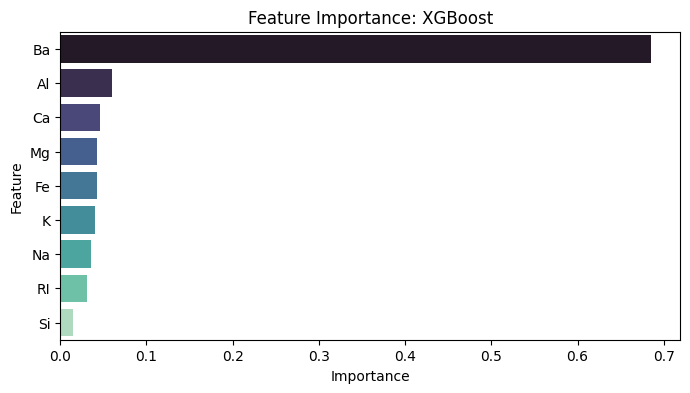

/tmp/ipython-input-643044152.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="mako")


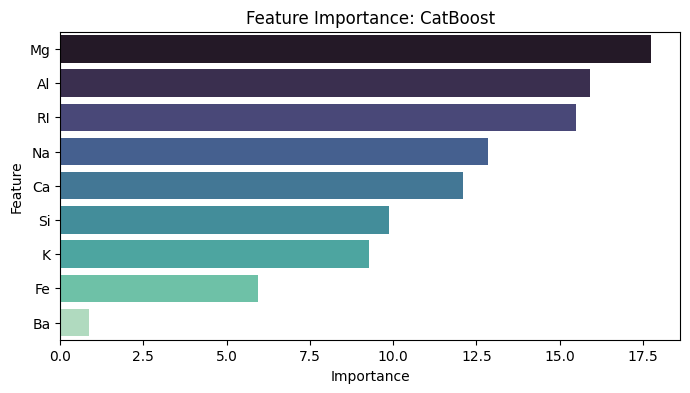

Сравнение точности:
Decision Tree   — Accuracy: 0.7385
Random Forest   — Accuracy: 0.8308
AdaBoost        — Accuracy: 0.5077
XGBoost         — Accuracy: 0.8308
CatBoost        — Accuracy: 0.8308

Лучшая модель: Random Forest с точностью 0.8308

=== Decision Tree ===


ValueError: Found input variables with inconsistent numbers of samples: [65, 3]

In [30]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42, eval_metric='mlogloss', use_label_encoder=False),
    "CatBoost": CatBoostClassifier(iterations=200, verbose=0, random_seed=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"model": model, "acc": acc, "pred": y_pred}

plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=[r["acc"] for r in results.values()], palette="viridis")
plt.title("Сравнение точности моделей", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()

for name, res in results.items():
    cm = confusion_matrix(y_test, res["pred"])
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

plt.figure(figsize=(35, 15))
plot_tree(results["Decision Tree"]["model"],
          feature_names=X.columns,
          class_names=[str(c) for c in np.unique(y)],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Structure")
plt.show()

def plot_feature_importance(model, model_name):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(8, 4))
        sns.barplot(x=importances[indices], y=np.array(X.columns)[indices], palette="mako")
        plt.title(f"Feature Importance: {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.show()

for name, res in results.items():
    plot_feature_importance(res["model"], name)

print("Сравнение точности:")
for name, res in results.items():
    print(f"{name:15s} — Accuracy: {res['acc']:.4f}")

best_model = max(results.items(), key=lambda x: x[1]['acc'])
print(f"\nЛучшая модель: {best_model[0]} с точностью {best_model[1]['acc']:.4f}")



In [31]:
from sklearn.metrics import classification_report

print("\n=== Classification Reports ===")
for name, res in results.items():
    print(f"\n--- {name} ---")
    print(classification_report(y_test, res["pred"], target_names=[str(c) for c in np.unique(y)]))


=== Classification Reports ===

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.82      0.61      0.70        23
           2       0.33      0.40      0.36         5
           3       0.75      0.75      0.75         4
           4       0.50      0.67      0.57         3
           5       0.82      1.00      0.90         9

    accuracy                           0.74        65
   macro avg       0.67      0.71      0.68        65
weighted avg       0.75      0.74      0.74        65


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.86      0.78      0.82        23
           2       1.00      0.40      0.57         5
           3       0.60      0.75      0.67         4
           4       0.75      1.00      0.86         3
           5       1.00      0.89      0.94         9
